<a href="https://colab.research.google.com/github/amruthkumarp/Regression_model/blob/main/DNA_seq_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing requried modules/library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
chim_dna=pd.read_table('/content/chimpanzee.txt')
chim_dna.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


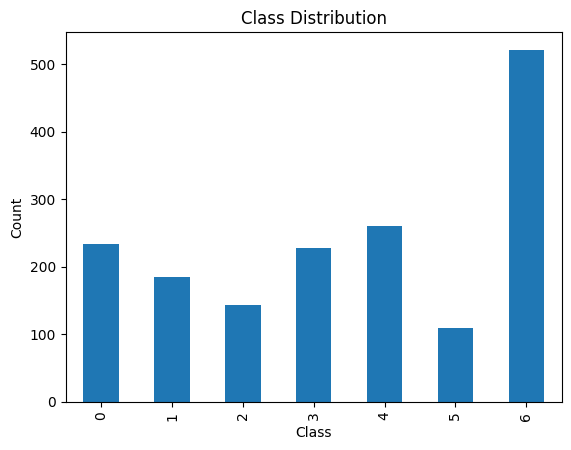

In [ ]:
chim_dna['class'].value_counts().sort_index().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

defining kmer encoder

In [ ]:
def Kmers_funct(seq, size=6):
    return [seq[x:x+size].lower() for x in range(len(seq) - size + 1)]


In [ ]:
chim_dna.head()


,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [ ]:
chim_dna['kmmer'] = chim_dna.apply(lambda x: Kmers_funct(x['sequence']), axis=1)
chim_dna = chim_dna.drop('sequence', axis=1)

In [ ]:
chim_dna.head()

,class,kmmer
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


In [ ]:
chim_txt=list(chim_dna['kmmer'])
for i in range(0,len(chim_txt)):
    chim_txt[i]=' '.join(chim_txt[i])
chim_txt[0]

'atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatacc ataccg taccgc accgcc ccgccg cgccgt gccgta ccgtat cgtatg gtatga tatgac atgacc tgaccc gaccca acccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctg tcctga cctgac ctgaca tgacac gacact acacta cactat actatt ctattt tatttc atttct tttctc ttctcg tctcgt ctcgtc tcgtca cgtcac gtcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaat taaatt aaattc aattca attcaa ttcaaa tcaaat caaatt aaatta aattac attacc ttacca taccat accatc ccatct catcta atctac tctacc ctaccc tacccc accccc cccccc ccccct cccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaaa caaaac aaaacc aaaccc aaccca acccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaac aaaact aaacta aactac actaca ctacaa tacaat acaata caataa aataaa ataaa

In [ ]:
y_chim=chim_dna.iloc[:,0].values
print(y_chim)

[4 4 4 ... 6 3 3]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1, ngram_range=(4,4))
X_chim = vectorizer.fit_transform(chim_txt)
print(X_chim)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3177156 stored elements and shape (1682, 229684)>
  Coords	Values
  (0, 52357)	1
  (0, 205463)	1
  (0, 135407)	1
  (0, 78630)	1
  (0, 77729)	2
  (0, 74128)	2
  (0, 60151)	1
  (0, 6493)	1
  (0, 25507)	1
  (0, 100816)	1
  (0, 174048)	1
  (0, 2965)	1
  (0, 11615)	1
  (0, 45405)	1
  (0, 177987)	1
  (0, 20957)	1
  (0, 82607)	1
  (0, 92971)	1
  (0, 136820)	1
  (0, 84070)	1
  (0, 98333)	1
  (0, 162273)	1
  (0, 184408)	1
  (0, 51391)	1
  (0, 201635)	1
  :	:
  (1681, 174991)	1
  (1681, 51650)	1
  (1681, 181568)	1
  (1681, 53995)	1
  (1681, 203492)	1
  (1681, 72704)	1
  (1681, 94239)	1
  (1681, 213264)	1
  (1681, 157139)	1
  (1681, 156632)	1
  (1681, 161596)	1
  (1681, 154159)	1
  (1681, 134999)	1
  (1681, 78933)	1
  (1681, 170427)	1
  (1681, 182268)	1
  (1681, 195248)	1
  (1681, 95126)	1
  (1681, 48535)	1
  (1681, 165295)	1
  (1681, 99179)	1
  (1681, 50321)	1
  (1681, 146894)	1
  (1681, 141579)	1
  (1681, 48254)	1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_chim, y_chim, test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print("\n")
print("Accuracy score: ", accuracy_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("Precision score: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall score: ", recall_score(y_test, y_pred, average='weighted'))

Confusion matrix for predictions on human test DNA sequence

Predicted   0   1   2   3   4   5    6  All
True                                       
0          27   0   0   0   0   0    1   28
1           0  38   0   0   0   0    1   39
2           0   0  25   0   0   0    2   27
3           0   0   0  41   0   0    2   43
4           2   1   0   3  40   0    6   52
5           3   0   0   0   3  19    4   29
6           0   0   0   1   0   0  118  119
All        32  39  25  45  43  19  134  337


Accuracy score:  0.913946587537092
F1 score:  0.9109242726006948
Precision score:  0.9197801649173679
Recall score:  0.913946587537092


prediction time

In [ ]:
y_pred_chimp = classifier.predict(X_chim)

In [ ]:
print("Confusion matrix for predictions on human test DNA sequence\n")
print(pd.crosstab(y_chim, y_pred_chimp, rownames=['True'], colnames=['Predicted'], margins=True))
print("\n")
print("Accuracy score: ", accuracy_score(y_chim, y_pred_chimp))
print("F1 score: ", f1_score(y_chim, y_pred_chimp, average='weighted'))
print("Precision score: ", precision_score(y_chim, y_pred_chimp, average='weighted'))
print("Recall score: ", recall_score(y_chim, y_pred_chimp, average='weighted'))

Confusion matrix for predictions on human test DNA sequence

Predicted    0    1    2    3    4   5    6   All
True                                             
0          233    0    0    0    0   0    1   234
1            0  184    0    0    0   0    1   185
2            0    0  142    0    0   0    2   144
3            0    0    0  226    0   0    2   228
4            2    1    0    3  249   0    6   261
5            3    0    0    0    3  99    4   109
6            0    0    0    1    0   0  520   521
All        238  185  142  230  252  99  536  1682


Accuracy score:  0.9827586206896551
F1 score:  0.982627938171494
Precision score:  0.983031768465534
Recall score:  0.9827586206896551
